# Decission Tree

Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.
Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

The branches/edges represent the result of the node and the nodes have either: 

- Conditions [Decision Nodes]
- Result [End Nodes]

## Decision Tree Regression: 
Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

Discrete output example: A weather prediction model that predicts whether or not there’ll be rain on a particular day. 
Continuous output example: A profit prediction model that states the probable profit that can be generated from the sale of a product.
Here, continuous values are predicted with the help of a decision tree regression model.
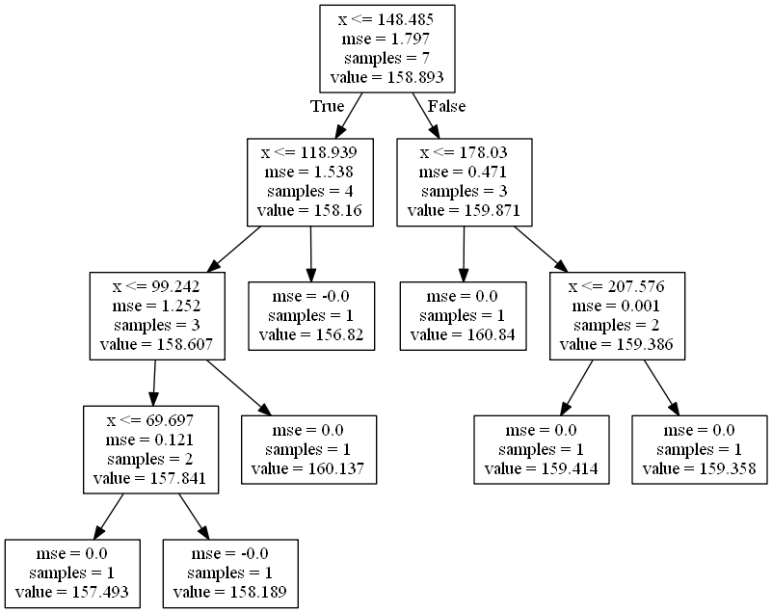

## Attribute Information
date: Date in format dd/mm/yyyy
time: time in format hh:mm:ss
global_active_power: household global minute-averaged active power (in kilowatt)
global_reactive_power: household global minute-averaged reactive power (in kilowatt)
voltage: minute-averaged voltage (in volt)
global_intensity: household global minute-averaged current intensity (in ampere)
sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.
Here I have added the sub_metering_1, sub_metering_2, sub_metering_3 columns to have one target column i.e., metering.

### Importing Libraries

In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Ingestion

In [2]:
df = pd.read_excel('Electricity_consumption.xlsx')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,metering
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,18.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21996 entries, 0 to 21995
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   21996 non-null  datetime64[ns]
 1   Time                   21996 non-null  object        
 2   Global_active_power    21992 non-null  float64       
 3   Global_reactive_power  21992 non-null  float64       
 4   Voltage                21992 non-null  float64       
 5   Global_intensity       21992 non-null  float64       
 6   metering               21992 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.2+ MB


In [4]:
# Feature modification
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)

### Detecting and Handelling Missing Values

In [5]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      4
Global_reactive_power    4
Voltage                  4
Global_intensity         4
metering                 4
dtype: int64

In [6]:
def check_null(df):   # works for both numerical and categorical data
    null_values = df.isnull().sum().sum()
    if null_values == 0:
        print('No null values exist')
    else:
        from sklearn.impute import SimpleImputer
        #imputing with most frequent values
        imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
        imputer = imputer.fit(df)
        imputed_df = pd.DataFrame(imputer.transform(df.loc[:,:]), columns = df.columns)
        return imputed_df

In [7]:
imputed_df = check_null(df)

In [8]:
imputed_df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
metering                 0
dtype: int64

In [9]:
df = imputed_df

In [10]:
df = df.drop(['Date', 'Time'], axis=1)

In [11]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,metering
0,4.216,0.418,234.84,18.4,18.0
1,5.36,0.436,233.63,23.0,17.0
2,5.374,0.498,233.29,23.0,19.0
3,5.388,0.502,233.74,23.0,18.0
4,3.666,0.528,235.68,15.8,18.0
...,...,...,...,...,...
21991,2.574,0.132,241.89,10.6,0.0
21992,2.576,0.132,242.06,10.6,0.0
21993,2.586,0.134,242.61,10.6,0.0
21994,2.648,0.212,241.93,11.0,0.0


In [12]:
X = df.drop('metering', axis=1)
y = df['metering']

### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.90, random_state = 355)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

2199 2199
19797 19797


### Model Building

In [14]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X_train and y_train data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [15]:
y_regression_pred = regressor.predict(X_test)

In [16]:
#R-squared & Adjusted R-Squared
from sklearn.metrics import r2_score
score = r2_score(y_test, y_regression_pred)
score

0.335328920709388

### Hyper parameter tuning